### Implementation Of ANN using Keras:

In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 53.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 72.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 82.9 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 

In [2]:
import tensorflow as tf 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

2024-04-13 11:25:41.829160: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 11:25:41.834459: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 11:25:41.910111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 11:25:43.132081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import keras
print(f"Tensorflow version: {tf.__version__}")
print(f"Tensorflow version: {keras.__version__}")

Tensorflow version: 2.16.1
Tensorflow version: 3.2.1


In [4]:
os.getcwd()  # current working directory is /home/jovyan/work

'/home/jovyan/work'

### Creating a simple classifier using keras in MNIST dataset

In [5]:
# mnist is a dataset that has black background and white digit that is used for performing deep learning training
mnist=tf.keras.datasets.mnist

In [6]:
mnist

<module 'keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/datasets/mnist/__init__.py'>

In [7]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
X_train_full[0]  # first image of train data 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train_full.shape  # 60000 images of 28 by 28 pixels (each pixel will have a value between 0-255)

(60000, 28, 28)

In [10]:
X_test.shape   # 10000 images of 28 by 28 pixels

(10000, 28, 28)

In [11]:
# Train: 55000 (taking first 5000 images for validation and rest 5000 till end will be train data ) 
# test : 10000 
# validate: 5000

In [12]:
# create a validation data set from the full training data 
# scale the data between 0-1 by diving it by 255 as its unsigned data between 0-255 range
X_valid,X_train=X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000]/255., y_train_full[5000:]/255.

# scale the dataset as well
X_test=X_test/255.

In [13]:
len(X_train_full[5000:]) # now train data become 55000 and validate 5000 out of 60000 training datasets

55000

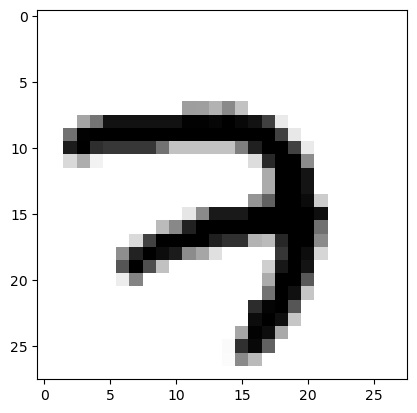

In [14]:
# plot the image
plt.imshow(X_train[0],cmap="binary")
plt.show()

<AxesSubplot: >

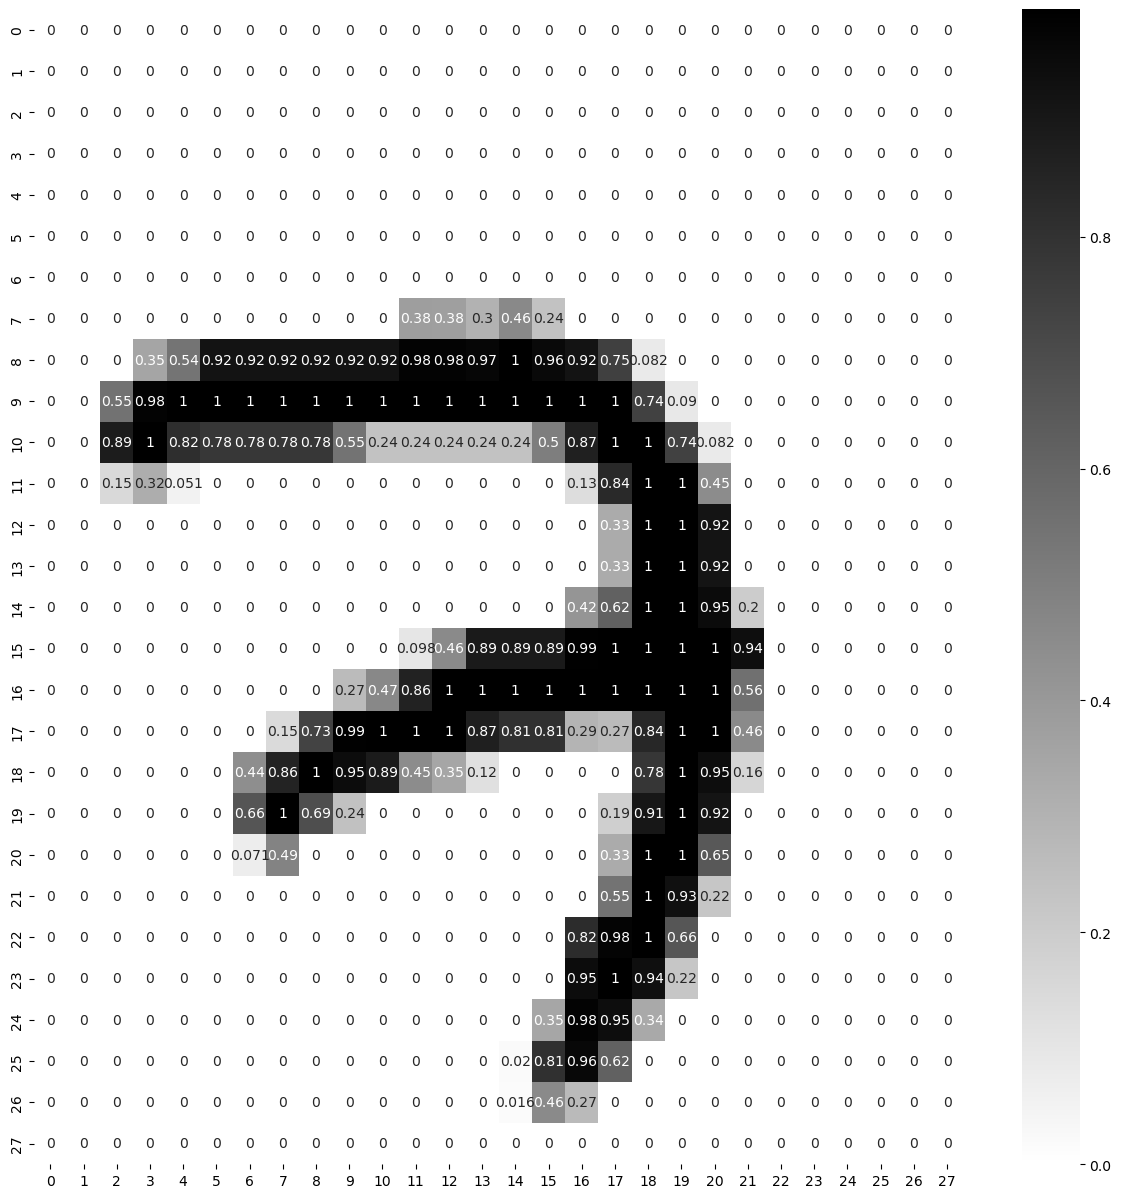

In [15]:
# plot the image as an heatmap
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

In [16]:
# Trainable Parameters:

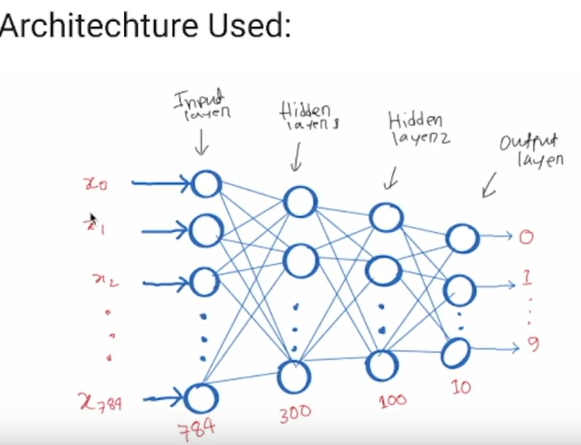

In [17]:
28*28  # we have 784 inputs neuron(each neuron for 1 pixel of a image: there are 784 pixels in an image )

784

In [18]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [19]:
# Creating layers of ANN:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")] 
# Dense means each neuron is connected with all other neuron in next layer

# sequential is a type of model in keras whereas a singular and seamless flow (input -> hidden 1 -> hidden 2 -> output)
model_clf=tf.keras.models.Sequential(LAYERS)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# METHOD-2

In [21]:
from keras.models import Sequential
# from keras.layers import Dense,Flatten

# # define the model
# model=Sequential()
# model.add(Flatten(input_shape=[28,28],name="inputlayer"))
# # model.add(Dense(units=64,activation="relu",kernel_regularizer=regularizers.L2(1e-4))) 
# model.add(Dense(units=64,activation="relu",kernel_initializer=tf.keras.initializers.zeros())) # all weights is 0 so neuron will not learn properly
# # we want to implement L2 regularization corresponding to the weights and biases and the lambda is 10^-4 here 
# model.add(Dropout(0.2)) # every 64 neurons have the 0.2 probability to be dropout and 0.8 probability to keep active
# # model.add(Dense(units=32,activation="relu",kernel_regularizer=regularizers.L1L2(l1=1e-5,l2=1e-4))) # elastic regularization
# model.add(Dense(units=32,activation="relu",kernel_initializer=tf.keras.initializers.zeros())) 
# model.add(Dropout(0.2))
# model.add(Dense(units=16,activation="relu",kernel_initializer=tf.keras.initializers.zeros())) 
# model.add(Dense(units=10,activation="softmax"))

In [22]:
# from keras.models import Sequential
# from keras.layers import Dense,Flatten

# # define the model
# model=Sequential()
# model.add(Flatten(input_shape=[28,28],name="inputlayer"))
# model.add(Dense(units=64,activation="relu",kernel_initializer=tf.keras.initializers.GlorotNormal())) 
# model.add(Dropout(0.2)) 
# model.add(Dense(units=32,activation="relu",kernel_initializer=tf.keras.initializers.GlorotNormal())) 
# model.add(Dropout(0.2))
# model.add(Dense(units=16,activation="relu",kernel_initializer=tf.keras.initializers.GlorotNormal())) 
# model.add(Dense(units=10,activation="softmax"))

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

# define the model
model=Sequential()
model.add(Flatten(input_shape=[28,28],name="inputlayer"))
model.add(Dense(units=64,activation="relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None))) 
model.add(Dropout(0.2)) 
model.add(Dense(units=32,activation="relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None))) 
model.add(Dropout(0.2))
model.add(Dense(units=16,activation="relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None))) 
model.add(Dense(units=10,activation="softmax"))

In [24]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Dense name=outputLayer, built=True>]

In [25]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,210 (1.02 MB)

 Trainable params: 267,410 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

In [26]:
# no of trainable parameters after input layer for first neuron = 784 weights coming from input layer + 1 bias (total: 785)
# so total trainable parameters after input layer = 785 * 300
785 * 300
# similarly for next layers 
# no of trainable parameters after hidden layer1 for first neuron = 300 weights coming from hidden layer1 + 1 bias (total: 301)
# so total trainable parameters after input layer = 301 * 100 = 30100
# similarly for next layers 
# no of trainable parameters after hidden layer2 for first neuron = 100 weights coming from hidden layer1 + 1 bias (total: 101)
# so total trainable parameters after input layer = 101 * 10 = 1010

235500

In [27]:
# total trainable parameters:
235500+30100+1010

266610

In [28]:
# access the layer name 
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [29]:
hidden1.get_weights()[0].shape # at hidden layer 1 it gets 784 weights for 300 neurons 

(784, 300)

In [30]:
hidden1.get_weights()[1].shape   # at hidden layer 1 it gets 300 biases 

(300,)

In [31]:
weights,biases=hidden1.get_weights()

In [32]:
print("weight shape: ",weights.shape)
weights  # weights got randomly initialized

weight shape:  (784, 300)


array([[-0.03311913,  0.06728771,  0.04366662, ..., -0.01431761,
         0.05026982,  0.00821087],
       [ 0.06761177,  0.02174097,  0.07361828, ..., -0.03830096,
         0.00329878,  0.04337236],
       [-0.01203705, -0.0601604 , -0.07118547, ..., -0.03256978,
        -0.04882078,  0.04000446],
       ...,
       [-0.04499898,  0.0378247 , -0.05217388, ...,  0.04689344,
        -0.00451154,  0.06995602],
       [ 0.06761822,  0.02912147,  0.05997401, ...,  0.02921277,
        -0.07307182, -0.06064393],
       [ 0.00332116,  0.06261097, -0.01530638, ..., -0.0711334 ,
        -0.05939985,  0.04877274]], dtype=float32)

In [33]:
print("bias shape: ",biases.shape)
biases

bias shape:  (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
LOSS_FUNCTION="sparse_categorical_crossentropy" # use=> tf.keras.sparse_categorical_crossentropy
# sparse_categorical it will mark all the digits as labels and  output will be in form of probabilities
# it takes th digits as an input and then perform one hot encoding on that and then calculate the soft,ax output then calculate the loss
# OPTIMIZER="SGD"  # or use with custom learning rate => tf.keras.optimiziers.SDG(0.02)
# sgd=tf.keras.optimizers.SGD(
#     learning_rate=0.1,
#     momentum=0.9)
adam=tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.96)
METRICS=["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                 optimizer=adam,
                 metrics=METRICS)

### TensorBoard Callback Functions:

In [35]:
# logging
log_folder='logs'
%load_ext tensorboard
# !rm -rf logs 
!rm -rf logs  # remove logs of previous execution
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_folder,histogram_freq=1)

### Early Stopping callback 

In [36]:
# If the monitor parameter is not specified in tf.keras.callbacks.EarlyStopping(), it will default to monitor

In [37]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5)
# min_delta value should be very less so that model can match the reduction in every epochs(otherwise it will abruptly stop the model from going on)

### Model Checkpointing callbacks 

In [38]:
CKPT_path="Model_ckpt.keras"
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [39]:
#Training of model
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)  # after every epoch we will calculate the accuracy and validation

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32,callbacks=[tb_cb,early_stopping_cb])  #checkpointing_cb
# batch_size=32 means for every iteration the dataset is divided into 32 batches.(pick 32 rows at random and fed to NN)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0959 - loss: 0.0937 - val_accuracy: 0.0958 - val_loss: 3.9590e-07
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0969 - loss: 1.0349e-07 - val_accuracy: 0.0958 - val_loss: 1.0297e-07
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0997 - loss: 5.3229e-08 - val_accuracy: 0.0958 - val_loss: 8.3112e-08
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0979 - loss: 2.9099e-08 - val_accuracy: 0.0958 - val_loss: 5.8149e-08
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0972 - loss: 1.5067e-08 - val_accuracy: 0.0958 - val_loss: 3.7860e-08
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0990 - loss: 5.2464e-09 - val_accuracy: 0.0958 - val_loss: 1.6689e-08
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0982 - loss: 1.8486e-09 - val_accuracy: 0.0958 - val_loss: 1.6689e-08
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━

In [40]:
%tensorboard --logdir={log_folder}
# It will give the interface that will show how our training validation and accuracy got increase and the training and validation losses got reduced over epochs.
# it will give an interactive visualization

In [41]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

ValueError: File not found: filepath=Model_ckpt.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
ckpt_model.predict(X_test)

In [ ]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
    os.makedirs(MODEL_dir, exist_ok= True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(MODEL_dir, fileName)
    print(f"Model {fileName} will be saved at {model_path}")
    return model_path

In [ ]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH 

In [ ]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [ ]:
history.params

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test,y_test)

### SAMPLE CHECK TEST DATA

In [ ]:
x_new=X_test[:3] # take first 3 data from the X_test 

In [ ]:
actual=y_test[:3]
actual

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2],annot=True,cmap="binary")

In [ ]:
y_prob=model_clf.predict(x_new)
y_prob.round(2) # round off two 2 digits 

In [ ]:
y_prob  # it gives the probabilities of the prediction
 
# we have 3 images it gives 3 batches of 10 probabilities (each probalities belongs to only one digit )

In [ ]:
y_pred=np.argmax(y_prob,axis=-1) # argmax will give the argument for maximum values 
y_pred

In [ ]:
actual

In [ ]:
# plot
for data ,pred,actual_data in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap="binary")
    plt.title(f"Predicted {pred} and actual {actual_data}")
    plt.axis("off")
    plt.show()
    print("###############")